In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
from smearly.ml_logic.preprocessing import resize_pad_image_tf, image_file_to_tf
import matplotlib.pyplot as plt
import tensorflow as tf

(224, 224, 3)


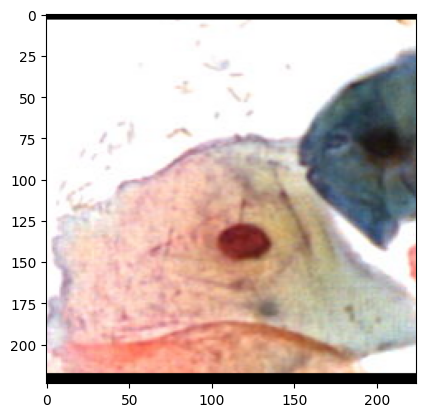

In [32]:
# Read the image file
img = image_file_to_tf('../raw_data/all/healthy/isbi2025_ps3c_train_image_03449.png')

img_resized = resize_pad_image_tf(img)
print(img_resized.shape)
plt.imshow(img_resized);

In [4]:
import os

# Specify the directory path
all_img_basedir = '../raw_data/all/bothcells'

# Filter out only the files (not directories)
file_names = [f for f in os.listdir(all_img_basedir) if os.path.isfile(os.path.join(all_img_basedir, f))]

print(len(file_names))

for file_name in file_names:
    shape = resize_pad_image_tf(image_file_to_tf(os.path.join(all_img_basedir, file_name))).shape
    if shape != (224, 224, 3):
        print(shape)

3448


In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

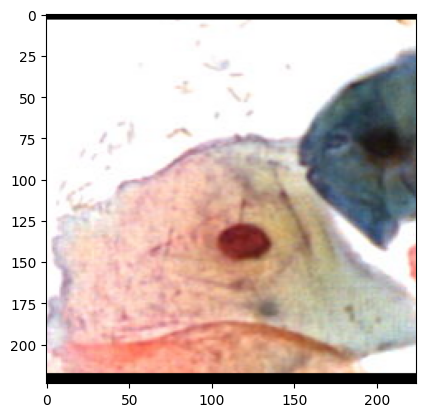

In [62]:
img = image_file_to_tf('../raw_data/all/healthy/isbi2025_ps3c_train_image_03449.png')

# Create a custom transformer using FunctionTransformer
resize_pad_transformer = FunctionTransformer(resize_pad_image_tf)

# Create a pipeline with your custom preprocessing function and a model
pipeline = make_pipeline(resize_pad_transformer)


new_img = pipeline.transform(img)
plt.imshow(new_img);

In [9]:
from smearly.ml_logic.preprocessing import create_image_dataset

all_img_basedir = '../raw_data/all'

img_ds = create_image_dataset(all_img_basedir)

Found 85080 files belonging to 4 classes.


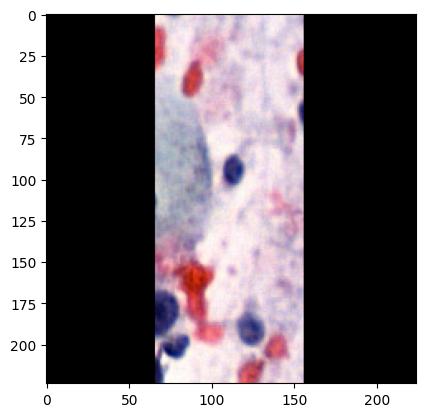

In [18]:
import matplotlib.pyplot as plt
for img, label in img_ds.take(1):
    plt.imshow(img[0])

In [21]:
for image, label in img_ds:
    if image.shape != (32, 224, 224, 3):
        print(image.shape)
    #print("Normalized image shape:", image.shape)  # Check the shape of the image
    #print("Labels:", label)  # Check the labels

(24, 224, 224, 3)


2025-03-12 10:31:17.325393: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [43]:
import random
l = list(range(10))

random.seed(42)
random.shuffle(l)
l[:3]

[7, 3, 2]

In [60]:
from smearly.tools.image_files import generate_new_img_dir

class_nb_files = {
    'bothcells': 30,
    'healthy': 10,
    'unhealthy': 10,
    'rubbish': 10
}

generate_new_img_dir(class_nb_files, test_size=0.3)


In [23]:
class_nb_files = {
    'bothcells': 10,
    'healthy': 10,
    'unhealthy': 10,
    'rubbish': 10
}

class_nb_files_test = {k: int(v*0.3) for k, v in class_nb_files.items()}
class_nb_files_train = {k: v-class_nb_files_test[k] for k, v in class_nb_files.items()}

class_nb_files_test, class_nb_files_train

({'bothcells': 3, 'healthy': 3, 'unhealthy': 3, 'rubbish': 3},
 {'bothcells': 7, 'healthy': 7, 'unhealthy': 7, 'rubbish': 7})

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

nb_bothcells = 3448

nb_healthy = 28895
nb_rubbish = 50371
nb_unhealthy = 2366 + nb_bothcells

nb_total = nb_healthy + nb_rubbish + nb_unhealthy

healthy = [1, 0, 0]
rubbish = [0, 1, 0]
unhealthy = [0, 0, 1]

y_true = np.vstack([
    np.tile(healthy, (nb_healthy, 1)),
    np.tile(rubbish, (nb_rubbish, 1)),
    np.tile(unhealthy, (nb_unhealthy, 1))
])

y_pred = np.tile(rubbish, (nb_total, 1)) # 0.440
y_pred = np.tile([rubbish, healthy], (nb_total//2, 1)) # 0.458
y_pred = np.tile([rubbish]*5 + [healthy]*3, (nb_total//8, 1)) # 0.481


weighted_f1 = f1_score(y_true, y_pred, average='weighted')
weighted_f1


0.4810539664412466

In [156]:
#np.tile([[rubbish]*5, [healthy]*3], (2,1))
[rubbish]*5 + [healthy]*3

[[0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0]]

In [132]:
from smearly.misc.baseline_metrics import get_baseline_f1_score

print(get_baseline_f1_score(None))

[0.         0.74375235 0.        ]


In [ ]:
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 0, 0, 1, 1, 2]  # True labels
y_pred = [0, 0, 0, 1, 1, 2, 2]  # Predicted labels

f1_scores = f1_score(y_true, y_pred, average=None)
print(f"F1-scores for each class: {f1_scores}")

conf_matrix = confusion_matrix(y_true, y_pred)
support = conf_matrix.sum(axis=1)

conf_matrix, support

F1-scores for each class: [0.85714286 0.5        0.66666667]


(array([[3, 1, 0],
        [0, 1, 1],
        [0, 0, 1]]),
 array([4, 2, 1]))

In [ ]:
set_class_nb_files = {
    'train': {
        'bothcells': 12,
        'healthy': 4,
        'unhealthy': 7,
        'rubbish': 8
    },
    'test': {
        'bothcells': 3,
        'healthy': 3,
        'unhealthy': 3,
        'rubbish': 3
    },
    'val': {
        'bothcells': 0.01,
        'healthy': 0.01,
        'unhealthy': 0.01,
        'rubbish': 0.01
    }
}

from smearly.tools.image_files import generate_new_img_dir

generate_new_img_dir(set_class_nb_files, resize_pad_size=None)

In [28]:
nb_bothcells = 3448

nb_healthy = 28895
nb_rubbish = 50371
nb_unhealthy = 2366 + nb_bothcells

nb_total = nb_healthy + nb_rubbish + nb_unhealthy

nb_healthy/nb_total, nb_rubbish/nb_total, nb_unhealthy/nb_total


(0.3396215326751293, 0.5920427832628115, 0.06833568406205924)

In [45]:
from smearly.ml_logic.model import initialize_enb0_model, compile_model

effnet_model = initialize_enb0_model()

effnet_model = compile_model(effnet_model, learning_rate=0.01)

✅ EfficientNetB0 model initialized
✅ Model compiled
